## Ананьев Роман

#  Лабораторная работа 11
### Регрессионный анализ: парная линейная регрессия

In [35]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression 
%matplotlib inline 

# Задание 1
<!-- Осуществите статистическую обработку двумерной вы-
борки по следующему плану.
1) Постройте диаграмму рассеивания, найдите коэффициент кор-
реляции Пирсона; проверьте гипотезу о его значимости (выборки в
файле «Данные 11_1» подобраны таким образом, что она должна под-
твердиться).
2) Составьте уравнения линейной регрессии Y на x и X на y
(без использования функций языка программирования Python, непо-
средственно находящих регрессионные прямые).
3) Нанесите графики выборочных прямых на диаграмму рассеива-
ния.
Проанализируйте полученные результаты с точки зрения их согла-
сованности с другими выборочными характеристиками (центром рассе-
ивания, диаграммой рассеивания, коэффициентом корреляции).
Для контроля выполните п. 2 задания с помощью соответствующей
функции языка программирования Python. -->

### 1.1.1

In [36]:
sample = pd.read_excel("Data_11_1.xlsx", header=0)
X = sample['Вариант 17'].to_list()[1:]
Y = sample['Unnamed: 34'].to_list()[1:]

In [37]:
n = len(X)
for i in range(n):
    if not isinstance(X[i], float):
        X[i] = float(str(X[i]).replace(',', '.').replace('–', '-'))  
    if not isinstance(Y[i], float):
        Y[i] = float(str(Y[i]).replace(',', '.').replace('–', '-'))  

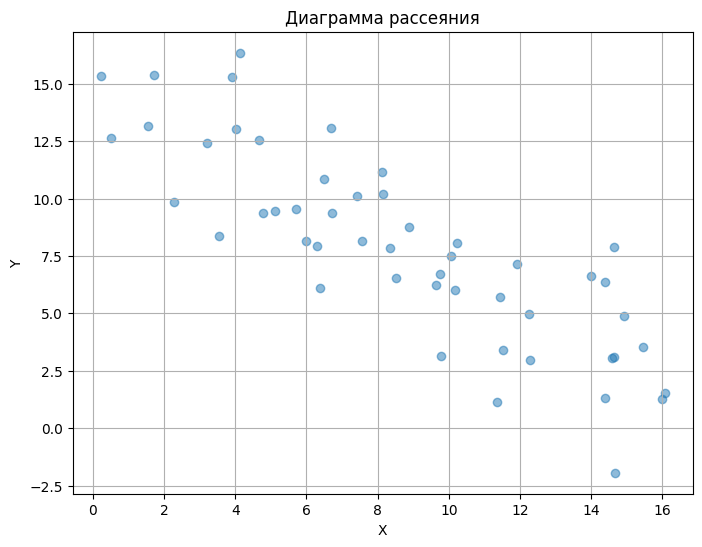

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5)
plt.title("Диаграмма рассеяния")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [39]:
corr_XY, p_value = sts.pearsonr(X, Y)
print(f"Коэффициент корреляции Пирсона: {corr_XY:.3f}")

Коэффициент корреляции Пирсона: -0.840


In [40]:
alpha = 0.01
t_stat = corr_XY * np.sqrt(n - 2) / np.sqrt(1 - corr_XY**2)
t_crit = sts.t.ppf(1 - alpha/2, df=n-2)

print(f"t-stat {t_stat:.4f}")
print(f"Z_crit (двусторонний тест): (-{t_crit:.4f}; {t_crit:.4f})")

print("Т.к. t_stat < t_crit Отвергаем H0: корреляция значима (ρ != 0).")

t-stat -10.7227
Z_crit (двусторонний тест): (-2.6822; 2.6822)
Т.к. t_stat < t_crit Отвергаем H0: корреляция значима (ρ != 0).


### 1.1.2

In [41]:
def linear_regression(X, Y):
    """
    Рассчитывает уравнение линейной регрессии второго списка на первый список.
    
    """ 

    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    
    cov_XY = np.sum((X - mean_X) * (Y - mean_Y))
    var_X = np.sum((X - mean_X) ** 2)
    
    b = cov_XY / var_X
    a = mean_Y - b * mean_X
    
    return a, b #коэффициенты регрессии

In [42]:
linear_regression(X, Y) # Y на X

(np.float64(14.698881352790528), np.float64(-0.7890693349563926))

In [43]:
linear_regression(Y, X) # X на Y

(np.float64(15.704674617172202), np.float64(-0.89406498865893))

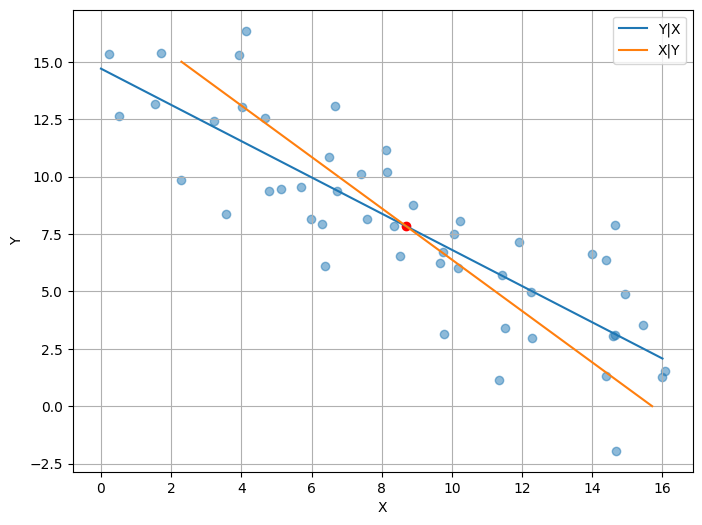

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5)

x1 = np.linspace(0, 16)
a1, b1 = linear_regression(X, Y)
y1 = a1 + b1 * x1  

y2 = np.linspace(0, 15)
a2, b2 = linear_regression(Y, X)
x2 = a2 + b2 * y2  

plt.plot(x1, y1, label = 'Y|X')
plt.plot(x2, y2, label = 'X|Y')
plt.scatter(np.mean(X), np.mean(Y), color = 'r') #центр рассеивания
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [45]:
np.corrcoef(X, Y)[0,1] # значение подтверждает сильную линейную связь

np.float64(-0.839928131454648)

In [46]:
X = np.array(X).reshape(-1, 1)
model = LinearRegression()
model.fit(X, Y)
a = model.intercept_  
b = model.coef_[0]
#проверка
print(a - a1, b - b1)

1.7763568394002505e-15 -1.1102230246251565e-16


### 1.2.1 - 1.2.2

In [47]:
Y_pred = model.predict(X)

# Остатки
residuals = Y - Y_pred

# Оценка дисперсии ошибок
n = len(Y)
s_squared = np.sum(residuals**2) / (n - 2)

print(f"Оценка дисперсии ошибок s² = {s_squared:.4f}")
print(f"Коэффициент детерминации R² = {model.score(X, Y)}")

Оценка дисперсии ошибок s² = 5.3277
Коэффициент детерминации R² = 0.7054792660088964


### 1.2.3

In [48]:
s = np.sqrt(s_squared)
X_mean = np.mean(X)
X_centered = X - X_mean
sum_X_centered_sq = np.sum(X_centered**2)

SE_a = s * np.sqrt(1/n + X_mean**2/sum_X_centered_sq)
SE_b = s / np.sqrt(sum_X_centered_sq)

# Критическое значение t-распределения
alpha = 0.05  # 95% доверительный интервал
t_crit = sts.t.ppf(1 - alpha/2, n - 2)

# Доверительные интервалы
CI_a = (a - t_crit * SE_a, a + t_crit * SE_a)
CI_b = (b - t_crit * SE_b, b + t_crit * SE_b)

print(f"Доверительный интервал для свободного члена (a): {CI_a}")
print(f"Доверительный интервал для коэффициента наклона (b): {CI_b}")

Доверительный интервал для свободного члена (a): (np.float64(13.25370606843154), np.float64(16.144056637149518))
Доверительный интервал для коэффициента наклона (b): (np.float64(-0.9370290693737284), np.float64(-0.6411096005390571))


### 1.2.4

In [49]:
chi2_low = sts.chi2.ppf(1 - alpha/2, n - 2)
chi2_high = sts.chi2.ppf(alpha/2, n - 2)

# Доверительный интервал
CI_low = (n - 2) * s_squared / chi2_low
CI_high = (n - 2) * s_squared / chi2_high

print(f"Доверительный интервал для σ²: ({CI_low:.4f}, {CI_high:.4f})")

Доверительный интервал для σ²: (3.7050, 8.3151)


### 1.2.5

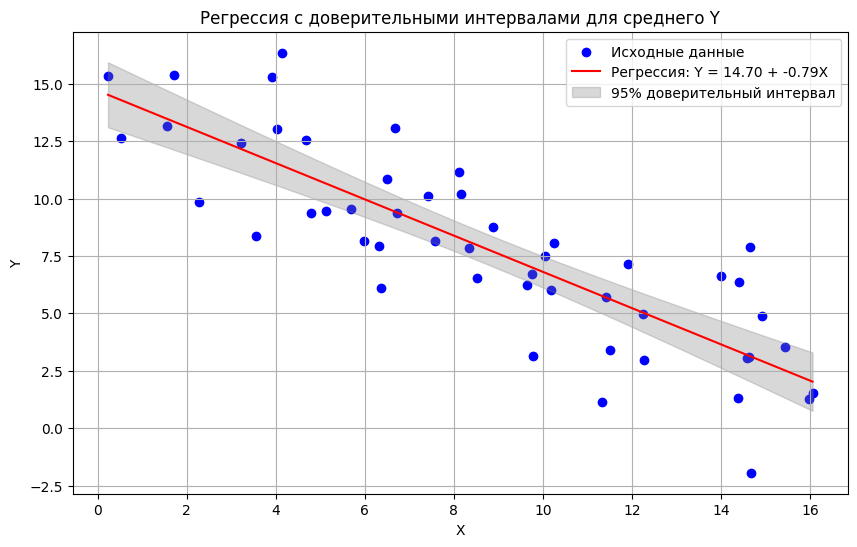

In [50]:
x_val = np.linspace(0.23, 16.06, 100)

# Расчет доверительных интервалов
alpha = 0.05
t_crit = sts.t.ppf(1 - alpha/2, n - 2)


predictions = a + b * x_val
sm = s * np.sqrt(1/n + (x_val - X_mean)**2 / sum_X_centered_sq)
CI_lower = predictions - t_crit * sm
CI_upper = predictions + t_crit * sm
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Исходные данные')

plt.plot(x_val, predictions, 'r-', label=f'Регрессия: Y = {a:.2f} + {b:.2f}X')

plt.fill_between(x_val, CI_lower, CI_upper, color='gray', alpha=0.3, label='95% доверительный интервал')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Регрессия с доверительными интервалами для среднего Y')
plt.legend()
plt.grid(True)
plt.show()

### 1.2.6

Доверительный интервал для коэффициента наклона (b) на уровне значимости 0.05: (-0.937, -0.641) (задание 1.2.3) => гипотеза b = 0 отвергнута => регрессионная модель значима

# Задание 2
<!-- 1) Для изучения вопроса об адекватности построенной
модели проанализируйте остатки (выборку значений случайных ошибок
наблюдений – разностей между наблюдаемыми значениями i y и вы-
численными по регрессионному уравнению 
y , 1,2,..., i n ). Построй-
i
те график зависимости остатков от j
x , постройте гистограмму выборки
значений случайных ошибок наблюдений, проверьте гипотезу о распре-
делении ошибок наблюдений по нормальному закону.
Замечание. При проведении регрессионного анализа считают, что
случайные ошибки наблюдений имеют нулевое математическое ожида-
ние, одинаковую дисперсию, попарно некоррелированы и распределены
по нормальному закону (и, следовательно, являются независимыми слу-
чайными величинами). Подтверждение перечисленных свойств остат-
ков говорит в пользу правильности построенной модели.
2) Сгруппируйте данные по x (данные группировки по x выве-
дите на печать ) и проверьте адекватность линейной регрессии Y на x
на уровне значимости 0,05. -->

### 2.1

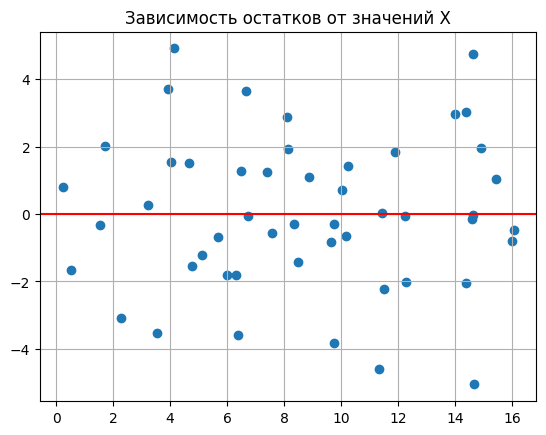

In [51]:
plt.scatter(X, residuals)
plt.grid(1)
plt.axhline(0, color = 'r')
plt.title("Зависимость остатков от значений X")
plt.show()

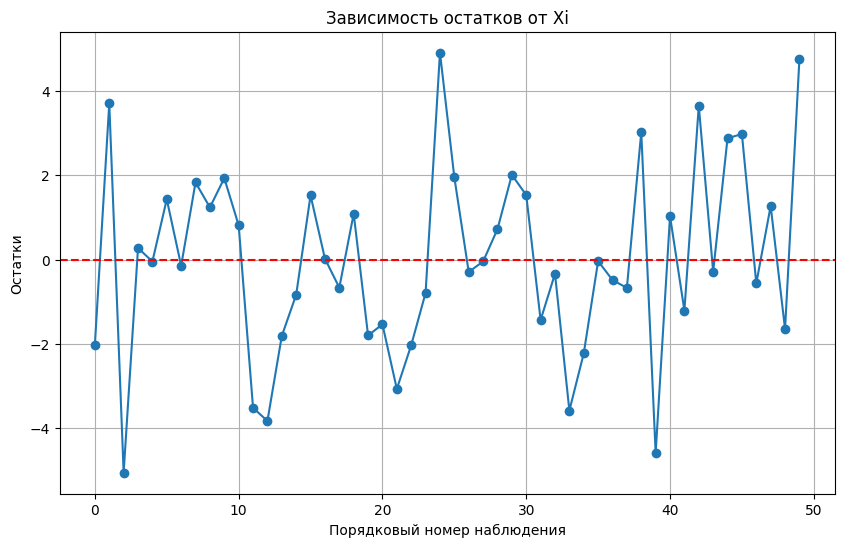

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(residuals, 'o-')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Зависимость остатков от Xi')
plt.xlabel('Порядковый номер наблюдения')
plt.ylabel('Остатки')
plt.grid(True)
plt.show()

In [53]:
shapiro_test = sts.shapiro(residuals)
print(f"Shapiro-Wilk test: W = {shapiro_test[0]:.4f}, p-value = {shapiro_test[1]:.4f}")

Shapiro-Wilk test: W = 0.9887, p-value = 0.9113


<Figure size 1000x600 with 0 Axes>

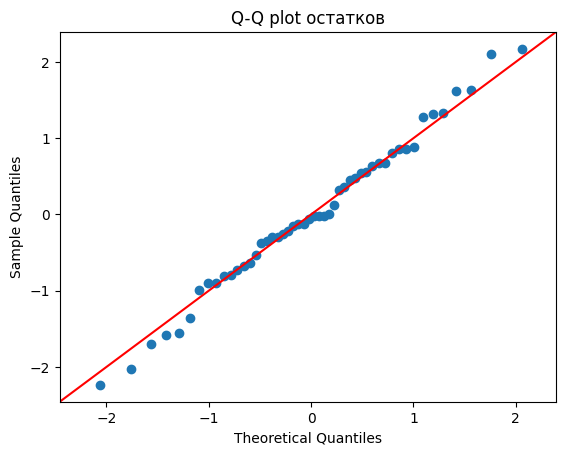

In [54]:
import statsmodels.api as sm


plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot остатков')
plt.show()

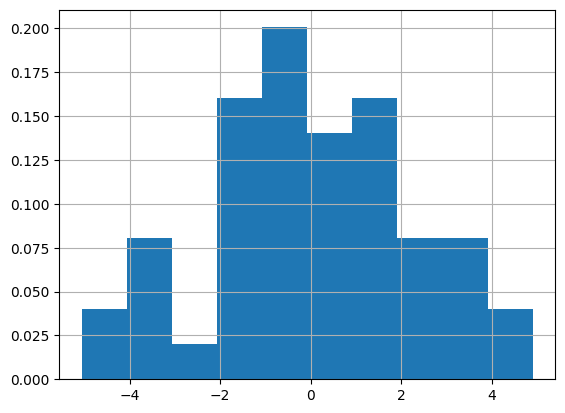

In [55]:
plt.hist(residuals, density=1)
plt.grid(1)
plt.show()

Из анализа графиков можно считать, что что
случайные ошибки наблюдений имеют нулевое математическое ожидание, одинаковую дисперсию, попарно некоррелированы и распределены
по нормальному закону 

### 2.2

In [56]:
Z = list(zip(X, Y))
Z = sorted(Z, key=lambda x: x[0])
X_1 = [x for x, y in Z]  
Y_1 = [y for x, y in Z]

In [57]:
"Группированные данные"
x = [round(np.mean(X_1[i : i + 5]), 4) for i in range(0, 50, 5)]
data = {x[i]: Y_1[5 * i: 5 * i + 5] for i in range(10)}
data

{np.float64(1.258): [15.33, 12.64, 13.14, 15.36, 9.83],
 np.float64(3.768): [12.44, 8.38, 15.31, 13.05, 16.35],
 np.float64(5.254): [12.53, 9.39, 9.45, 9.53, 8.16],
 np.float64(6.516): [7.92, 6.09, 10.84, 13.08, 9.35],
 np.float64(7.918): [10.09, 8.16, 11.17, 10.2, 7.83],
 np.float64(9.312): [6.55, 8.78, 6.25, 6.71, 3.16],
 np.float64(10.648): [7.49, 6.0, 8.05, 1.16, 5.7],
 np.float64(12.392): [3.39, 7.13, 4.98, 2.99, 6.63],
 np.float64(14.532): [1.32, 6.36, 3.04, 3.11, 7.9],
 np.float64(15.422): [-1.94, 4.87, 3.54, 1.29, 1.54]}

In [58]:
X_sorted = np.array([x for x, y in Z]).reshape(-1, 1)  # Преобразуем в 2D массив (n_samples, 1)
Y_sorted = np.array([y for x, y in Z])  # 1D массив

print(f"Форма X_train: {X_sorted.shape}")  # Должно быть (n_samples, 1)
print(f"Форма Y_train: {Y_sorted.shape}")  # Должно быть (n_samples,)

# Линейная регрессия
model1 = LinearRegression()
model1.fit(X_sorted, Y_sorted)

a = model1.coef_[0]  # Наклон (коэффициент при X)
b = model1.intercept_  # Свободный член
print(f"Наклон (a): {a}")
print(f"Свободный член (b): {b}")

Форма X_train: (50, 1)
Форма Y_train: (50,)
Наклон (a): -0.7890693349563926
Свободный член (b): 14.69888135279053


Параметры регрессии группированной и негруппированной выборки практически свопадают

In [59]:
# Средние для каждой группы
group_means = [np.mean(y_list) for y_list in data.values()]
# Все Y
Y = np.concatenate(list(data.values()))
# Общее среднее
global_mean = np.mean(Y)

In [61]:
Qp = np.sum(5 * (group_means - global_mean)**2)

Qe = 0
for xi, yi_list in data.items():
    group_mean = np.mean(yi_list)
    Qe += np.sum((yi_list - group_mean)**2)

print(f"Qp = {Qp:.2f}")
print(f"Qe = {Qe:.2f}")

Qp = 646.48
Qe = 221.81


In [62]:
df_1 = 8 # 10 - 2
df_2 = 40 # 50 - 10

F_stat = (Qe / 8) / (Qp / 40)

from scipy.stats import f
alpha = 0.05
F_crit = f.ppf(1 - alpha, df_1, df_2)

print(f"F-статистика = {F_stat:.2f}")
print(f"Критическое F (α=0.05) = {F_crit:.2f}")


F-статистика = 1.72
Критическое F (α=0.05) = 2.18


Гипотеза об адекватности принята